In [1]:
#Study of conservation of probabilities
#I want to look at the sum of probabilities that schmidt states are in an energy eigenstates. 
#I expect that it is conserved, but my gifs seems to be showing something different.




At some time t:
$$|\psi\rangle=\sqrt{s_0}|q_1\rangle|E_1\rangle>+\sqrt{s1}|q_2\rangle|E_2\rangle$$

Taking a total energy eingestate $|Ai\rangle$

The probability that the state be in this energy eigenstate is 
$$P(|\psi\rangle \text{ in } |A_i\rangle)=|\langle A_i|\psi\rangle|^2 = s_0|\langle A_i|q_1E_1\rangle|^2+s1|\langle A_i|q_2E_2\rangle|^2+\sqrt{s0s1}(\langle A_i|q_1E_1\rangle^*+\langle A_i|q_2E_2\rangle^*)$$

This can also be written,
$$P(|\psi\rangle \text{ in } |A_i\rangle)= s_0P(|Schmidt_1\rangle\text{ in }|A_i\rangle)+ s_1P(|Schmidt_2\rangle\text{ in }|A_i\rangle) +\sqrt{s0s1}(\langle A_i|q_1E_1\rangle^*+\langle A_i|q_2E_2\rangle^*)$$
Where the leftover are quantum interference terms.
Interestingly, $\sqrt{s_0s_1}$ is maximal for $s_0=s_1$ at maximal entanglement, when the worlds to my intuition, the worlds are supposed to be at maximal non-interference.

Next, we try to visualize this interference.




In [9]:
import numpy as np
import qutip as qt
import math
import matplotlib.pyplot as plt
from q_solve import generate_result
from Schmidt_solve import compute_schmidt_states_new
from Schmidt_solve import compute_schmidt_full
from Schmidt_solve import plot_schmidt_value_time
from Interference import interference_plot

In [2]:
#defining all quantities used in the simulation
d1, d2 = 10, 200
w = 0.3# smallest weight of the 2 eingestates, set btw 0 and 1
E_spacing = 1.0
Int_strength = 0.03
# Define the time settings for the simulation
tmax= 10
ind_nb = 100
#using all above to obtain QM qtts
result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total, ket_0, ket_1, initial_state_system_2 = generate_result(d1,d2,w, E_spacing, Int_strength, tmax, ind_nb,1)
time_indices = [0, 10, 20, 30, 49]  # Specify the time indices of interest

#eigenenergies_total, eigenstates_total = H_total.eigenstates() 

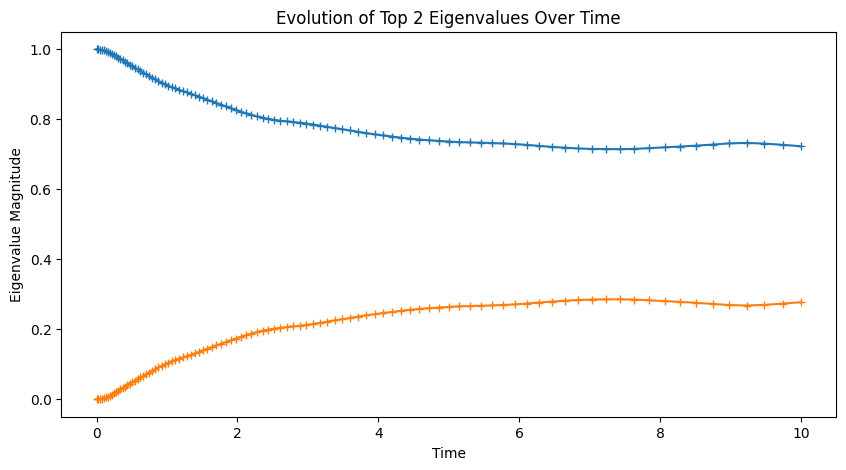

In [3]:
plot_schmidt_value_time(result,tlist)


Underneath here is the initial study, there is now a function to call that will plot the interference graph

We plot the 2 nonzero schmidt values over time. We will use them next

In [4]:
s_val_0=[]
s_val_1=[]
t_ind = range(len(tlist))
for idx in t_ind:
    ss, se, sv = compute_schmidt_states_new(result, idx)
    s_val_0.append(sv[0])
    s_val_1.append(sv[1])

We will now plot for total energy eigenstates 1000 to 1010 the evolution of $P(|\psi\rangle \text{ in } |A_i\rangle)\text{, } P(|Schmidt_1\rangle\text{ in }|A_i\rangle) \text{ and } P(|Schmidt_2\rangle\text{ in }|A_i\rangle)$

1000
1001
1002
1003
1004
1005
1006
1007
1008
1009
1010


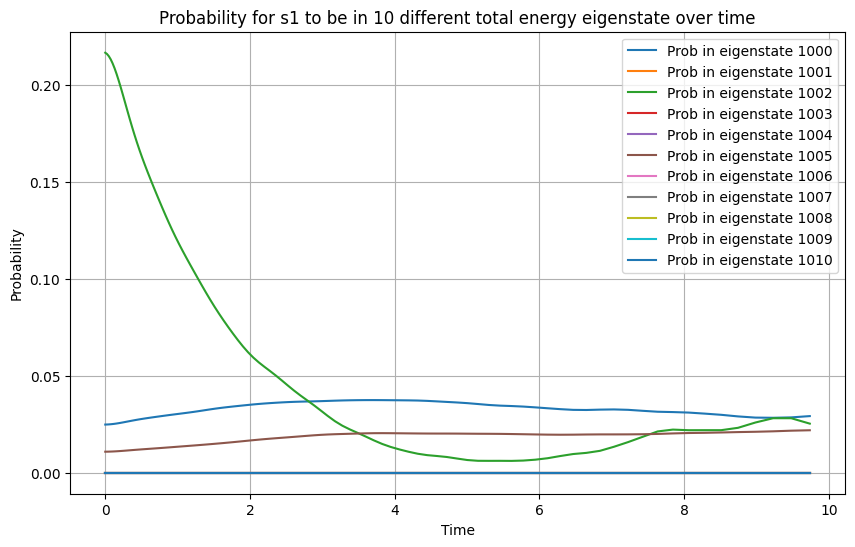

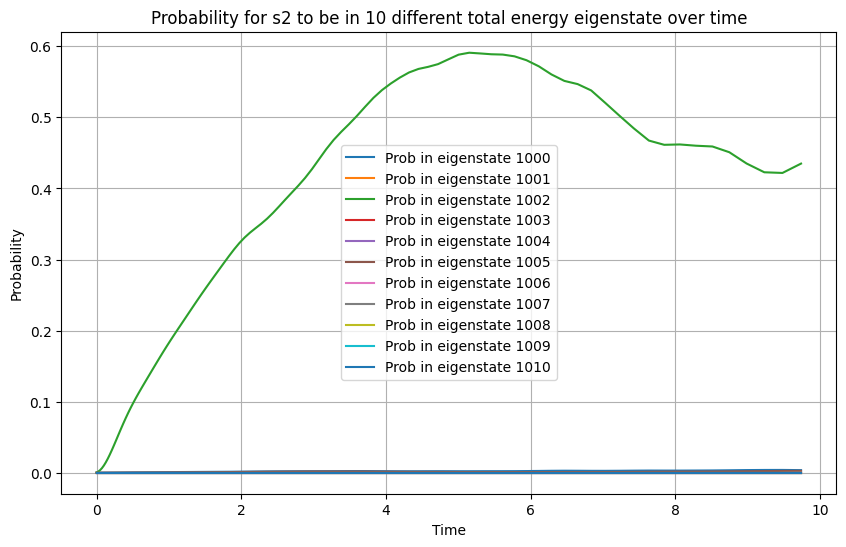

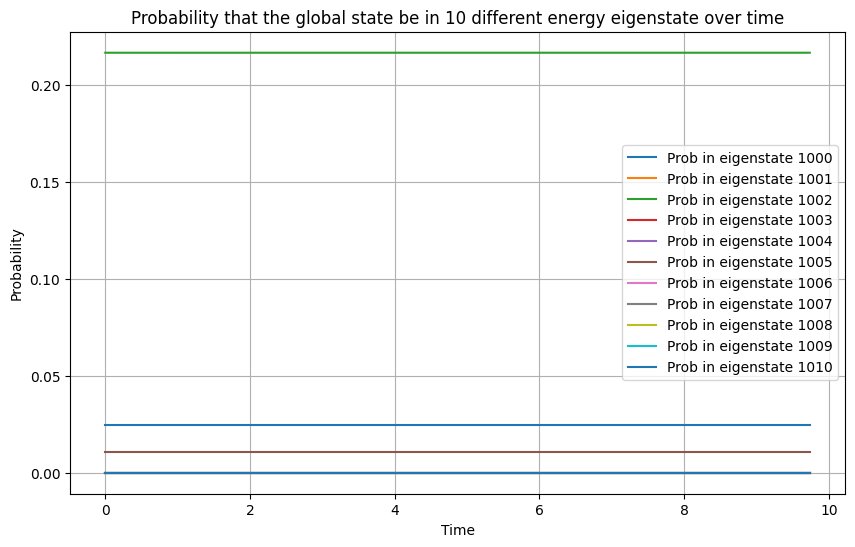

In [60]:
#set things up
prob_list=[]
prob_list2=[]
prob_list3=[]
start_num = 1000
end_num = 1010

# Create an array of integers between start_num and end_num
arr = np.arange(start_num, end_num + 1)

for i in arr:
    eig = eigenstates_total[i]
    prob=[]
    prob2=[]
    prob3=[]
    for idx in range(len(tlist)-1):
        prob.append(abs(np.vdot(compute_schmidt_full(result,idx+1,1), eig)) ** 2)
        prob2.append(abs(np.vdot(compute_schmidt_full(result,idx+1,2), eig)) ** 2)
        prob3.append(abs(np.vdot(result.states[idx].full(), eig)) ** 2)
        
    prob_list.append(prob)
    prob_list2.append(prob2)
    prob_list3.append(prob3)
    print(i)
#    for idx in range(len(tlist)):
#        state = compute_schmidt_2(result,idx,2)
#        energy_coeff.append(abs(np.vdot(state.conjugate(), eig)) ** 2)

plt.figure(figsize=(10, 6))
for prob in prob_list:
    plt.plot(tlist[0:99], prob)
plt.title('Probability for s1 to be in 10 different total energy eigenstate over time')
plt.xlabel('Time')
plt.ylabel('Probability')
plt.grid(True)
plt.legend([f'Prob in eigenstate {i}' for i in arr])
plt.show()

plt.figure(figsize=(10, 6))
for prob in prob_list2:
    plt.plot(tlist[0:99], prob)
plt.title('Probability for s2 to be in 10 different total energy eigenstate over time')
plt.xlabel('Time')
plt.ylabel('Probability')
plt.grid(True)
plt.legend([f'Prob in eigenstate {i}' for i in arr])
plt.show()

plt.figure(figsize=(10, 6))
for prob in prob_list3:
    plt.plot(tlist[0:99], prob)
plt.title('Probability that the global state be in 10 different energy eigenstate over time')
plt.xlabel('Time')
plt.ylabel('Probability')
plt.grid(True)
plt.legend([f'Prob in eigenstate {i}' for i in arr])
plt.show()


As expected the probabilities (if there are some in theses 10 eigenenergies) are conserved for the global state but vary for the probabiilities.

We also note that energy eigenstates for which s1 has nonzero probabilities match the ones where s2 has nonzero probabilities. That is, probabilities dont go to a schimt state in it entierty, it is shared.

We now look at quantum interferences, by choosing the eingenstate for which schmidt states have nonzero probability 

[4.734849988902513e-10, 0.0005295803519346544, 0.0016094667655603128, 0.00324509942393027, 0.005424880802460802, 0.008119342720898549, 0.011281469296473157, 0.014848309193486424, 0.018743891483536206, 0.02288331158422132, 0.027177702535259796, 0.03153967720956806, 0.03588874654008418, 0.04015618052744724, 0.044288809309758585, 0.04825136103362564, 0.052027065414609434, 0.05561640999806374, 0.0590341078724929, 0.062304531859099024, 0.065456088479343, 0.06851525202642991, 0.07150119473134438, 0.07442202692245152, 0.0772734993906741, 0.08004055712003803, 0.08270143675095491, 0.08523328252508795, 0.08761778277308478, 0.08984529901482234, 0.09191639693333584, 0.09384043745336829, 0.09563171344122315, 0.09730430281328303, 0.09886719801986135, 0.10032121788482787, 0.10165866749383046, 0.10286572166522832, 0.10392639081890445, 0.10482627079663369, 0.10555468867330324, 0.10610534579456996, 0.10647713121257159, 0.10667695461524127, 0.10672407942576255, 0.10665128596491777, 0.10649657356884945, 0

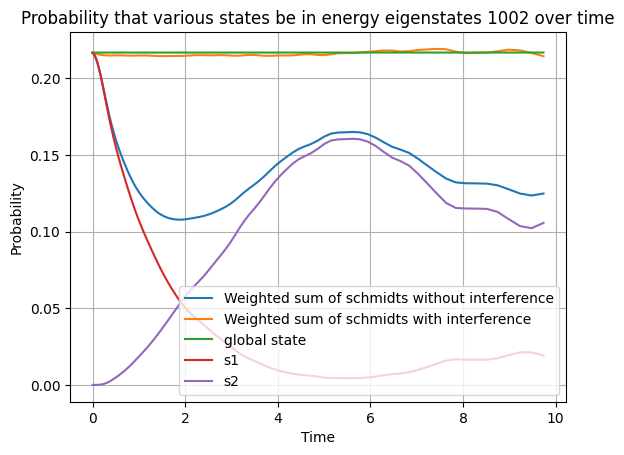

In [74]:
j=1002
i=j-1000

eig = eigenstates_total[j]
interf=[]
for idx in range(len(tlist)-1):
    interf.append(np.sqrt(s_val_0[idx]*s_val_1[idx])*(2*np.real(np.vdot(eig,compute_schmidt_full(result,idx+1,1)))*np.real(np.vdot(eig,compute_schmidt_full(result,idx+1,2)))+2*np.imag(np.vdot(eig,compute_schmidt_full(result,idx+1,1)))*np.imag(np.vdot(eig,compute_schmidt_full(result,idx+1,2)))))
    #interf.append(np.sqrt(s_val_0[idx]*s_val_1[idx])*(np.vdot(eig,compute_schmidt_full(result,idx+1,1))*(np.vdot(eig,compute_schmidt_full(result,idx+1,2)).conjugate()) + np.vdot(eig,compute_schmidt_full(result,idx+1,2))*(np.vdot(eig,compute_schmidt_full(result,idx+1,1)).conjugate())))
print(interf)

weighted = np.multiply(prob_list[i], s_val_0[0:99])+np.multiply(prob_list2[i], s_val_1[0:99])
weighted_plus_interf = weighted + interf
plt.plot(tlist[0:99], weighted)
plt.plot(tlist[0:99], weighted_plus_interf)
plt.plot(tlist[0:99], prob_list3[i][0:99])
plt.plot(tlist[0:99],np.multiply(prob_list[i], s_val_0[0:99]))
plt.plot(tlist[0:99],np.multiply(prob_list2[i], s_val_1[0:99]))
plt.legend(['Weighted sum of schmidts without interference','Weighted sum of schmidts with interference','global state','s1','s2'])
plt.title(f'Probability that various states be in energy eigenstates {j} over time')
plt.xlabel('Time')
plt.ylabel('Probability')
plt.grid(True)
plt.show()



#What this graph tells me is that somehow the sum of the probabilities of the 2 worlds being in  
#an energy eigenstate is not conserved over time.

# I need to do a more through examination of this for more states
#I need to verify theoretically that this is what we expect.
#I need to make sure thjat the multiplication by schmidt weight mak es sense.



We observe the interference, in the fact that the weighted sum does not add up to the global state probability. This means that we should not expect a conservation of total probability of being in an eigenstate when we look at the gifs of the weighted schmidt states.

We now look at things with a long time span


In [75]:
#defining all quantities used in the simulation
d1, d2 = 10, 200
w = 0.3# smallest weight of the 2 eingestates, set btw 0 and 1
E_spacing = 1.0
Int_strength = 0.09
# Define the time settings for the simulation
tmax= 1000
ind_nb = 1000
#using all above to obtain QM qtts
result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total, ket_0, ket_1, initial_state_system_2 = generate_result(d1,d2,w, E_spacing, Int_strength, tmax, ind_nb,0)
time_indices = [0, 10, 20, 30, 49]  # Specify the time indices of interest

eigenenergies_total, eigenstates_total = H_total.eigenstates() 

Text(0, 0.5, 'Eigenvalue Magnitude')

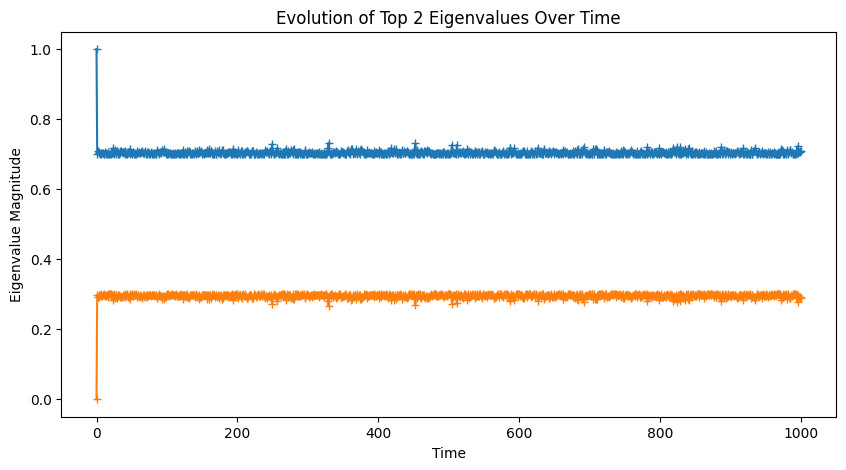

In [76]:

s_val_0=[]
s_val_1=[]
t_ind = range(len(tlist))
for idx in t_ind:
    ss, se, sv = compute_schmidt_states_new(result, idx)
    s_val_0.append(sv[0])
    s_val_1.append(sv[1])

plt.figure(figsize=(10, 5))
plt.plot(tlist,s_val_0, marker='+')
plt.plot(tlist,s_val_1, marker='+')
plt.title('Evolution of Top 2 Eigenvalues Over Time')
plt.xlabel('Time')
plt.ylabel('Eigenvalue Magnitude')


1000
1001
1002
1003
1004
1005
1006
1007
1008
1009
1010


ValueError: x and y must have same first dimension, but have shapes (99,) and (999,)

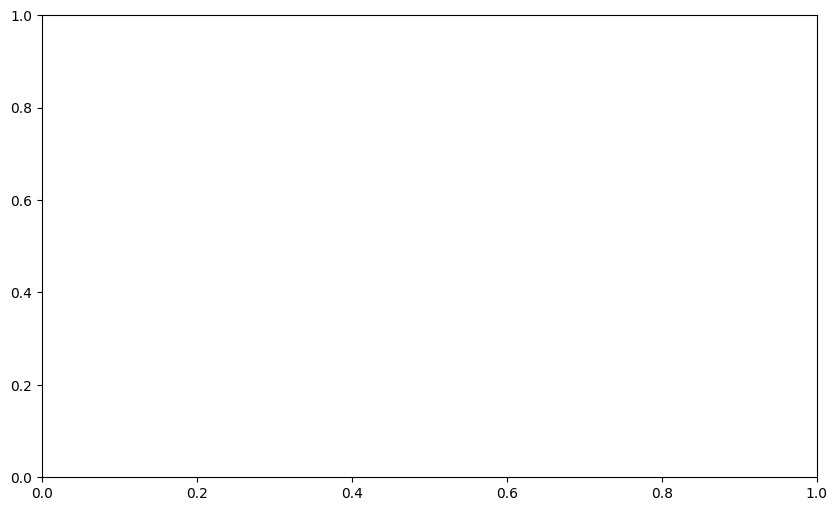

In [77]:
#set things up
prob_list=[]
prob_list2=[]
prob_list3=[]
start_num = 1000
end_num = 1010

# Create an array of integers between start_num and end_num
arr = np.arange(start_num, end_num + 1)

for i in arr:
    eig = eigenstates_total[i]
    prob=[]
    prob2=[]
    prob3=[]
    for idx in range(len(tlist)-1):
        prob.append(abs(np.vdot(compute_schmidt_full(result,idx+1,1), eig)) ** 2)
        prob2.append(abs(np.vdot(compute_schmidt_full(result,idx+1,2), eig)) ** 2)
        prob3.append(abs(np.vdot(result.states[idx].full(), eig)) ** 2)
        
    prob_list.append(prob)
    prob_list2.append(prob2)
    prob_list3.append(prob3)
    print(i)
#    for idx in range(len(tlist)):
#        state = compute_schmidt_2(result,idx,2)
#        energy_coeff.append(abs(np.vdot(state.conjugate(), eig)) ** 2)



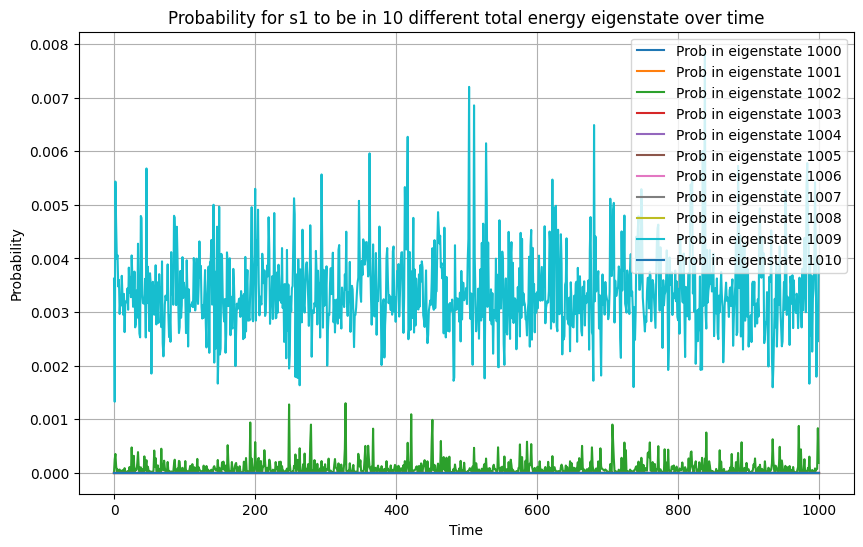

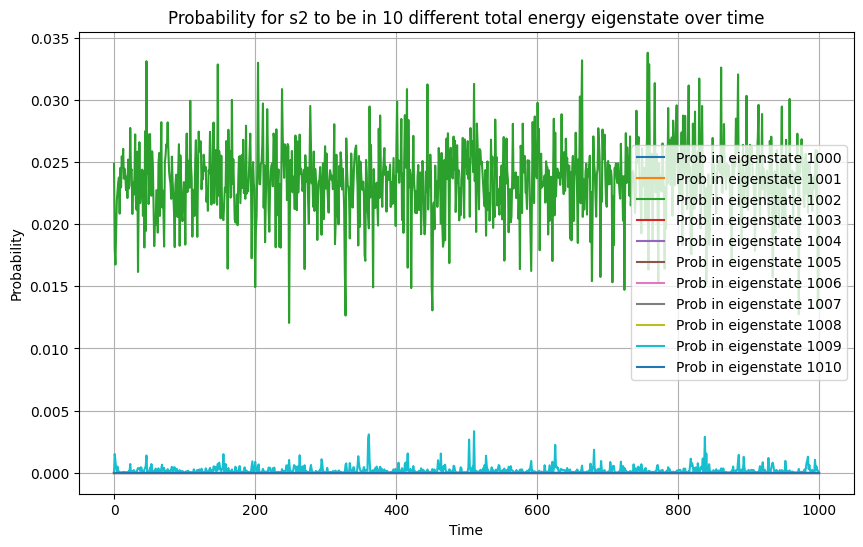

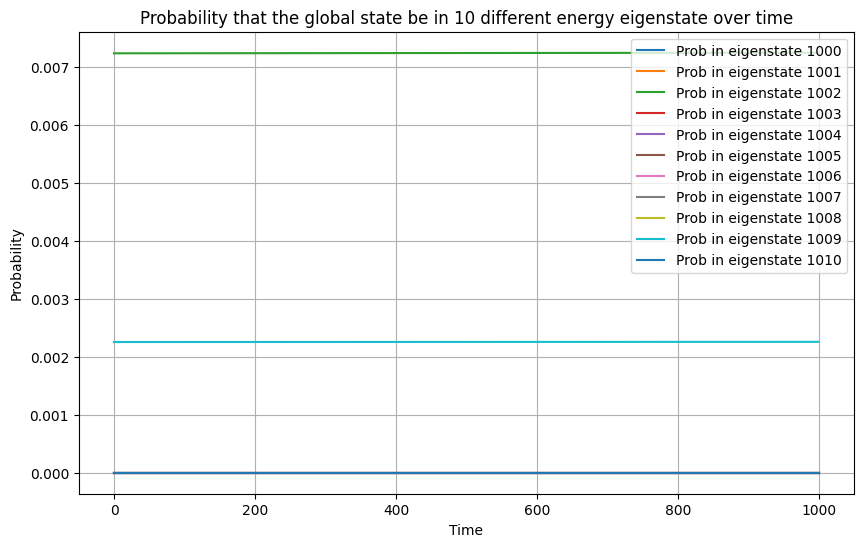

In [78]:

plt.figure(figsize=(10, 6))
for prob in prob_list:
    plt.plot(tlist[0:999], prob)
plt.title('Probability for s1 to be in 10 different total energy eigenstate over time')
plt.xlabel('Time')
plt.ylabel('Probability')
plt.grid(True)
plt.legend([f'Prob in eigenstate {i}' for i in arr])
plt.show()

plt.figure(figsize=(10, 6))
for prob in prob_list2:
    plt.plot(tlist[0:999], prob)
plt.title('Probability for s2 to be in 10 different total energy eigenstate over time')
plt.xlabel('Time')
plt.ylabel('Probability')
plt.grid(True)
plt.legend([f'Prob in eigenstate {i}' for i in arr])
plt.show()

plt.figure(figsize=(10, 6))
for prob in prob_list3:
    plt.plot(tlist[0:999], prob)
plt.title('Probability that the global state be in 10 different energy eigenstate over time')
plt.xlabel('Time')
plt.ylabel('Probability')
plt.grid(True)
plt.legend([f'Prob in eigenstate {i}' for i in arr])
plt.show()

We continue looking at long timescales, but we look at the interferences, and we use the function defined for the occasion

In [11]:
#defining all quantities used in the simulation
d1, d2 = 10, 200
w = 0.3# smallest weight of the 2 eingestates, set btw 0 and 1
E_spacing = 1.0
Int_strength = 0.03
# Define the time settings for the simulation
tmax= 100
ind_nb = 100
#using all above to obtain QM qtts
result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total, ket_0, ket_1, initial_state_system_2 = generate_result(d1,d2,w, E_spacing, Int_strength, tmax, ind_nb,0)

#eigenenergies_total, eigenstates_total = H_total.eigenstates() 

1000
1001
1002
1003
1004
1005
1006
1007
1008
1009
1010


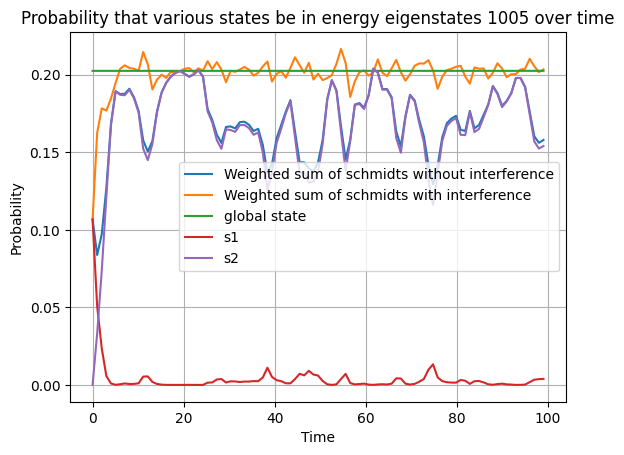

In [12]:
interference_plot(result, H_total, tlist, 1000,1010)

Notes on the inteference graphs. 

Having positive or negative interference is normal. Issue with orange line not following green one exactly is probably because I miscoded and schmidt1[t] and schmidt2[t+1] or mixed up. need to go back to it

We see that the probabilities not looking conserved in the total energy eigenbasis is explained, it is not. 

Annoyingly, they dont seem to add up to explaining the zeros in the edges of the spectrum of schmidt when compared to the distribution of a well disrtributed global state. ie, doesn;t explain the concentration.


We now define a measure of the total interference.


In [10]:
def total_interference(tlist,result,eigenstates_total,eigenenergies_total,EI,w):
    interference_list=[]
        

    for idx in range(len(tlist)-1):
        ss, se, sv = compute_schmidt_states_new(result, idx)
        s_val_0 = sv[0]
        s_val_1 = sv[1]

        state = result.states[idx+1].full()
        state1 = compute_schmidt_full(result,idx+1,1)
        state2 = compute_schmidt_full(result,idx+1,2)
        p=[abs(np.vdot(state, eigenstate)) ** 2 for eigenstate in eigenstates_total]
        p1=[abs(np.vdot(state1, eigenstate)) ** 2 for eigenstate in eigenstates_total]
        p2=[abs(np.vdot(state2, eigenstate)) ** 2 for eigenstate in eigenstates_total]
        interference = [abs(np.sqrt(s_val_0*s_val_1)*(2*np.real(np.vdot(eig,state1))*np.real(np.vdot(eig,state2))+2*np.imag(np.vdot(eig,state1))*np.imag(np.vdot(eig,state2)))) for eig in eigenstates_total]
        interference = np.sum(interference)
        print(interference)
        interference_list.append(interference)  
    plt.plot(tlist[0:len(tlist)-1], interference_list)
    plt.title(f"Plot of the total absolute interference between Schmidts 1 and 2 over time for EI={EI}, w={w}")
    plt.xlabel("Time")
    plt.ylabel("Interference (sum of probability difference with the global state)")
    plt.show()



In [18]:
#defining all quantities used in the simulation
d1, d2 = 10, 200
w = 0.3# smallest weight of the 2 eingestates, set btw 0 and 1
E_spacing = 1.0
Int_strength = 0.09
# Define the time settings for the simulation
tmax= 20
ind_nb = 200
#using all above to obtain QM qtts
result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total, ket_0, ket_1, initial_state_system_2 = generate_result(d1,d2,w, E_spacing, Int_strength, tmax, ind_nb,0)
eigenenergies_total, eigenstates_total = H_total.eigenstates() 

1.7455273289582142e-08
0.20790012183307383
0.30255078269328844
0.274175792470026
0.19195783050271764
0.11591091741836573
0.0719302168550038
0.03807386583475862
0.02480518772777276
0.03135964973001273
0.03334103067603554
0.01718300704940952
0.0030573010483257064
0.02094917255195488
0.03819007275157017
0.029012589249641726
0.03430434063880079
0.02741045818245511
0.01960134792181785
0.058371869912823476
0.05922368544455321
0.049202680466124984
0.05195166964516418
0.05696859547434509
0.04600019363504989
0.036465883218375086
0.03152342818681979
0.03339504059046707
0.03408173696990255
0.03427622862250884
0.02840077000000135
0.02930065481308479
0.03231251367567893
0.04368237250735922
0.05892516415713412
0.060503764222452516
0.04646747508859476
0.054137465418013016
0.07275041613387906
0.07356854639216642
0.08545692297098709
0.11788280557642745
0.1306595412573428
0.10612361356272013
0.07414635377689449
0.0656355054237328
0.058175450067172146
0.03964494603215675
0.0248715757493786
0.017006851213

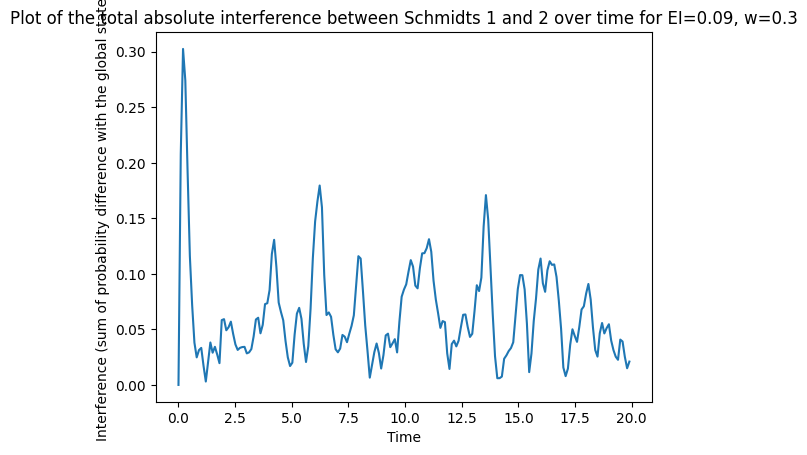

In [12]:
total_interference(tlist,result,eigenstates_total,eigenenergies_total,Int_strength,w)

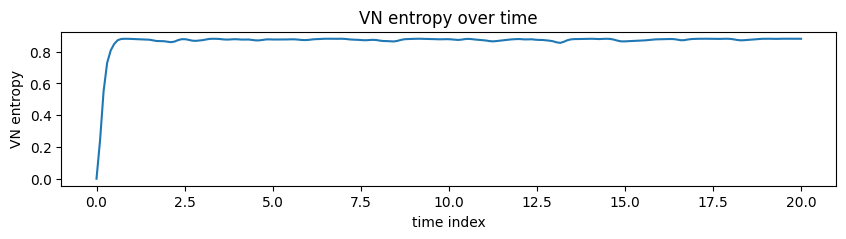

In [19]:
from VN import plot_VN
plot_VN(result,tlist,log=0)

In [20]:
#defining all quantities used in the simulation
d1, d2 = 10, 200
w = 0.3# smallest weight of the 2 eingestates, set btw 0 and 1
E_spacing = 1.0
Int_strength = 0.06
# Define the time settings for the simulation
tmax= 20
ind_nb = 200
#using all above to obtain QM qtts
result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total, ket_0, ket_1, initial_state_system_2 = generate_result(d1,d2,w, E_spacing, Int_strength, tmax, ind_nb,0)
eigenenergies_total, eigenstates_total = H_total.eigenstates() 

8.976231086636662e-09
0.091229637678031
0.20333174415762834
0.2813738440955279
0.3206737620861507
0.3328490244405188
0.32227523964918126
0.2942825728783769
0.25295293318713286
0.20847775384494022
0.17168262987146946
0.15362515568413893
0.14767825292932998
0.1402110638709596
0.12623684864588586
0.11353339770432788
0.1007952319454252
0.0847874496136977
0.06063974166311923
0.032913448451080664
0.017722475779603744
0.03681707299102565
0.061035285337836316
0.07985038109700499
0.08959760909915371
0.09603491715970411
0.09959356921981173
0.09888474057221433
0.08929282629145005
0.07155844379774094
0.04994026232160885
0.03260127430462719
0.0286551002984613
0.04328816901372745
0.05980700386245351
0.06654650456796603
0.0572847164118829
0.03492650190761093
0.01229266903262535
0.016337086714702128
0.028890302977322375
0.037393702182384574
0.04170658519947902
0.042351837862291596
0.03867185291137645
0.028933460570106786
0.01948082025659789
0.021468425767458103
0.029134820039284234
0.03135252702627196

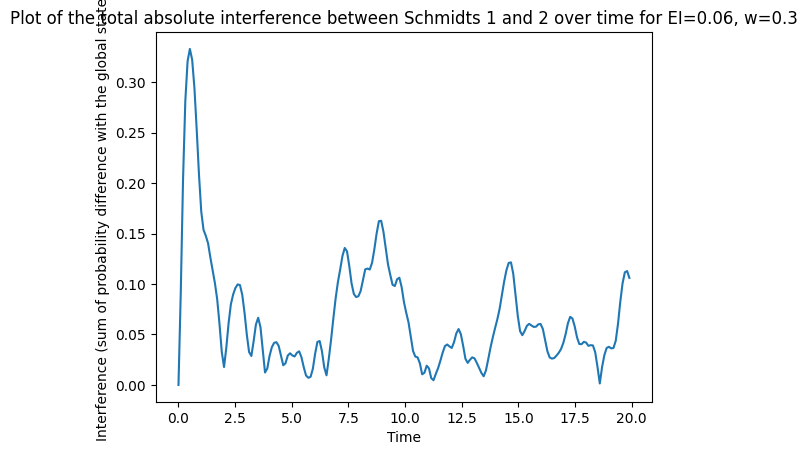

In [14]:
total_interference(tlist,result,eigenstates_total,eigenenergies_total,Int_strength,w)

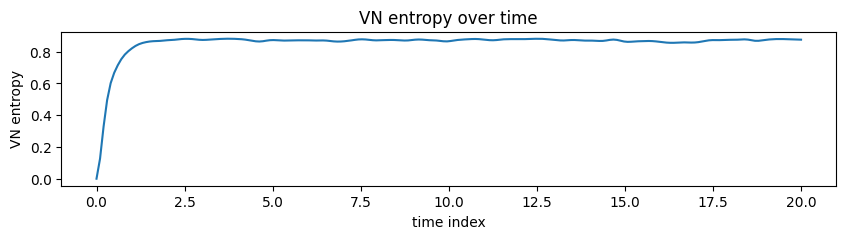

In [21]:

plot_VN(result,tlist,log=0)

In [22]:
#defining all quantities used in the simulation
d1, d2 = 10, 200
w = 0.3# smallest weight of the 2 eingestates, set btw 0 and 1
E_spacing = 1.0
Int_strength = 0.03
# Define the time settings for the simulation
tmax= 20
ind_nb = 200
#using all above to obtain QM qtts
result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total, ket_0, ket_1, initial_state_system_2 = generate_result(d1,d2,w, E_spacing, Int_strength, tmax, ind_nb,0)
eigenenergies_total, eigenstates_total = H_total.eigenstates() 

5.720466980938165e-09
0.03305893820960078
0.08332322119409045
0.13251128527074962
0.17163008170631056
0.20142168510763386
0.22688872241578253
0.2508984370279558
0.2736475489172547
0.2939803152695173
0.31063207266911735
0.32607916427344064
0.34111779771575557
0.35481897506603916
0.3667301795242568
0.3763401742373216
0.384189717499257
0.3896445686996053
0.39359785525602015
0.39632273410624375
0.3966170664541823
0.3956662744336224
0.39415517516096155
0.39188562599903426
0.38902658758319864
0.3859907371145365
0.38282408784786964
0.3790579704109026
0.37479296803497375
0.37058720400192124
0.366117029269091
0.3627190710573335
0.3600567208033895
0.35893384364877756
0.3582491514593494
0.35764947681575676
0.3566374676478309
0.35676579565899014
0.35534665397924037
0.3518884948785439
0.3469592031462064
0.3425775274856867
0.3377905707744881
0.3328294860680471
0.32741049476705053
0.3219860657400587
0.3162000911687913
0.31043108098958244
0.30463607846160157
0.299286735701608
0.29500764350317726
0.291

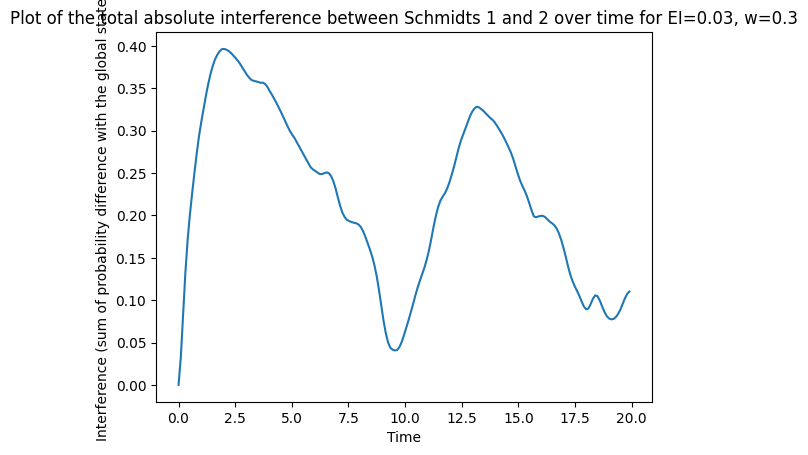

In [16]:
total_interference(tlist,result,eigenstates_total,eigenenergies_total,Int_strength,w)

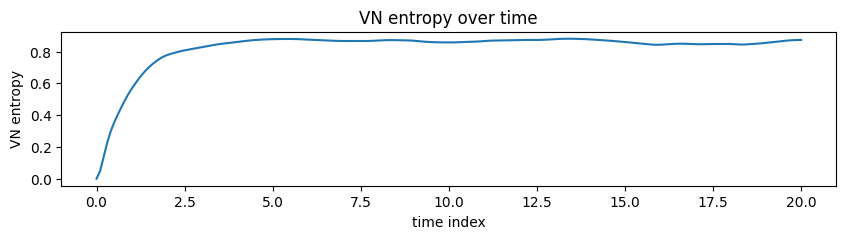

In [23]:

plot_VN(result,tlist,log=0)

Looking at all of gthese interferences, it really does not seem like anthing really stable happens after the initial decoherence bump... Maybe I should overlay VN entrop? is the decoherence time longer than what appears there???